In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
file_path = '/content/airfrance_tripadvisor_reviews.csv'
df = pd.read_csv(file_path)
df.head()

,rating,title,text,publishedDate
0,1,WORST AIRLINE,I travel a lot - and I travel often. Last week...,2024-11-13
1,1,Terrible experience with Airfrance,"This review is regarding flight AF185, we book...",2024-11-13
2,1,Extremely Disappointing Experience with Air Fr...,I recently flew with Air France on flight #185...,2024-11-12
3,1,Horrible,Wow!!! What a horrible experience!! I've alway...,2024-11-11
4,1,The Worst Flight Experience I’ve Ever Had,I spent a fantastic 10-day vacation in Hong Ko...,2024-11-11


In [3]:
df.isnull().sum()
df.dropna(inplace=True)

In [4]:
print(df.columns)

Index(['rating', 'title', 'text', 'publishedDate'], dtype='object')


In [5]:
print(df.head())

   rating                                              title  \
0       1                                      WORST AIRLINE   
1       1                 Terrible experience with Airfrance   
2       1  Extremely Disappointing Experience with Air Fr...   
3       1                                           Horrible   
4       1          The Worst Flight Experience I’ve Ever Had   

                                                text publishedDate  
0  I travel a lot - and I travel often. Last week...    2024-11-13  
1  This review is regarding flight AF185, we book...    2024-11-13  
2  I recently flew with Air France on flight #185...    2024-11-12  
3  Wow!!! What a horrible experience!! I've alway...    2024-11-11  
4  I spent a fantastic 10-day vacation in Hong Ko...    2024-11-11  


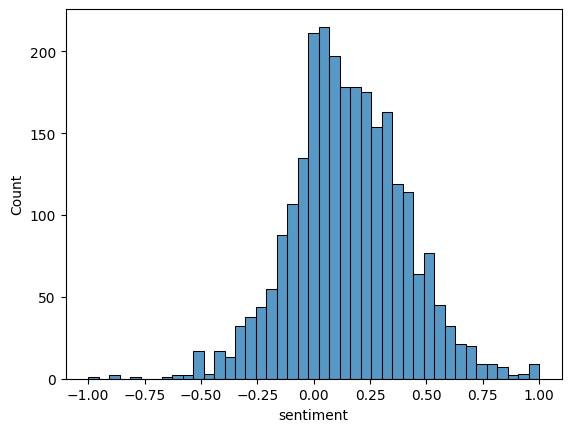

In [6]:
from textblob import TextBlob
import seaborn as sns
import pandas as pd

# Check if the column exists
if 'text' in df.columns:
    # Ensure the column is free of NaN and convert to string
    df = df.dropna(subset=['text'])
    df['text'] = df['text'].astype(str)

    # Apply sentiment analysis
    df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

    # Plot the sentiment distribution
    sns.histplot(df['sentiment'])
else:
    print("Column 'text' not found in the dataset. Check the column names:", df.columns)

In [7]:
df['length'] = df['text'].apply(len)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X = df[['length', 'sentiment']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.41015625

In [10]:
df['publishedDate'] = pd.to_datetime(df['publishedDate'], errors='coerce')

In [11]:
df['review_length'] = df['text'].apply(lambda x: len(x.split()))

In [12]:
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 rating           0
title            0
text             0
publishedDate    0
sentiment        0
length           0
review_length    0
dtype: int64


In [13]:
print("Rating Summary:\n", df['rating'].describe())
print("Review Length Summary:\n", df['review_length'].describe())

Rating Summary:
 count    2560.000000
mean        3.126172
std         1.530240
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
Review Length Summary:
 count    2560.000000
mean      112.749609
std       119.109085
min        13.000000
25%        42.000000
50%        76.000000
75%       138.000000
max      1699.000000
Name: review_length, dtype: float64


<ipython-input-14-4232f153ca15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


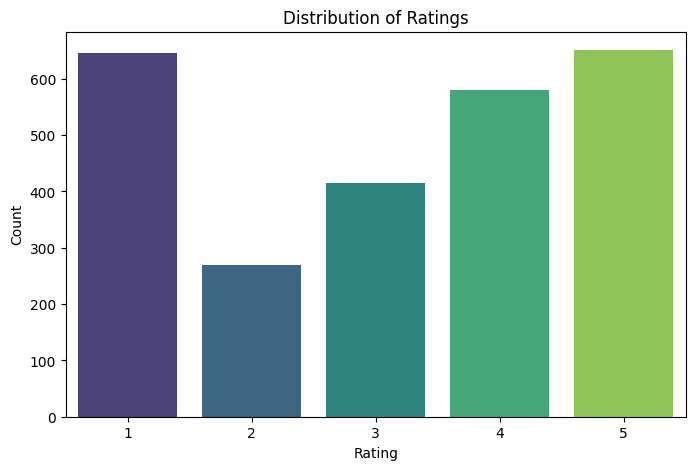

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

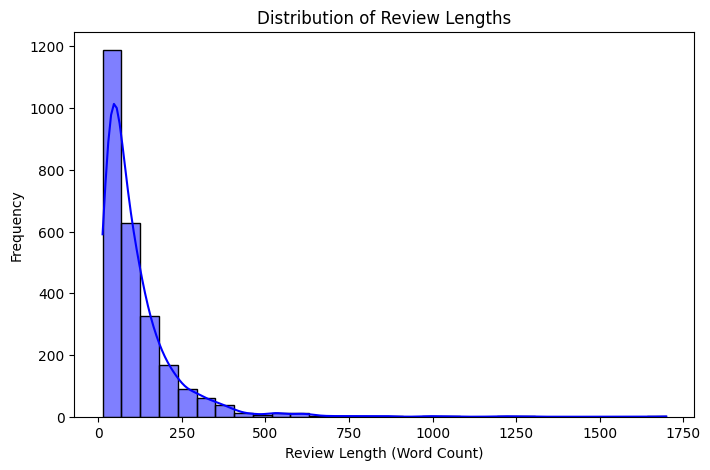

In [15]:
plt.figure(figsize=(8, 5))
sns.histplot(df['review_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length (Word Count)')
plt.ylabel('Frequency')
plt.show()

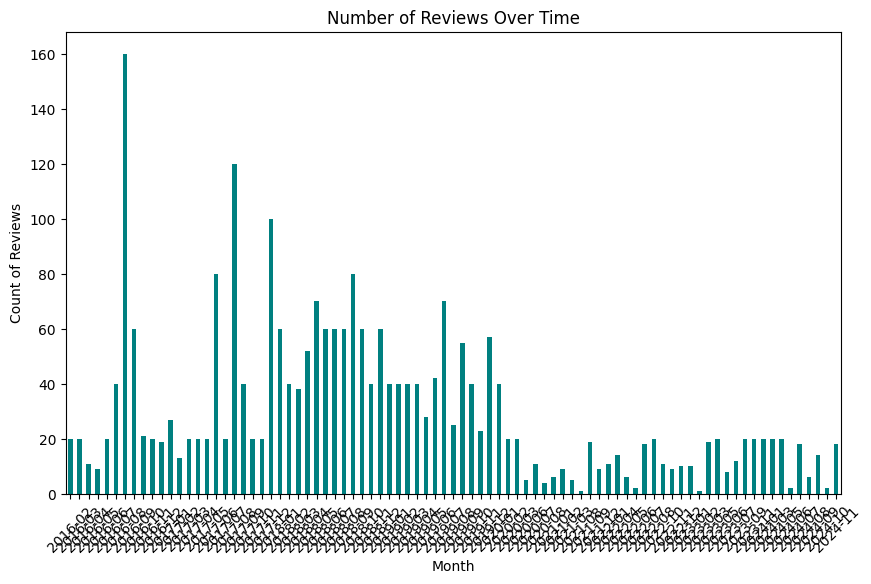

In [16]:
plt.figure(figsize=(10, 6))
df['publishedDate'].dt.to_period('M').value_counts().sort_index().plot(kind='bar', color='teal')
plt.title('Number of Reviews Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Reviews')
plt.xticks(rotation=45)
plt.show()

In [17]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

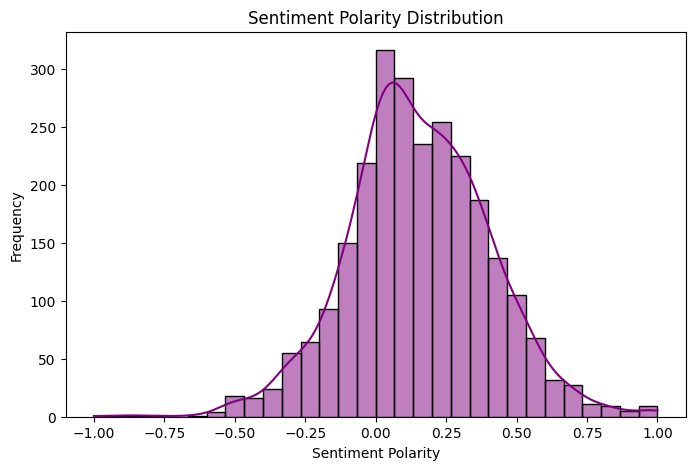

In [18]:
plt.figure(figsize=(8, 5))
sns.histplot(df['sentiment'], bins=30, kde=True, color='purple')
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

In [19]:
print("Sentiment Polarity Summary:\n", df['sentiment'].describe())

Sentiment Polarity Summary:
 count    2560.000000
mean        0.153011
std         0.251666
min        -1.000000
25%        -0.002068
50%         0.140235
75%         0.318785
max         1.000000
Name: sentiment, dtype: float64


In [20]:
from wordcloud import WordCloud

In [21]:
positive_reviews = " ".join(df[df['sentiment'] > 0]['text'])
negative_reviews = " ".join(df[df['sentiment'] < 0]['text'])

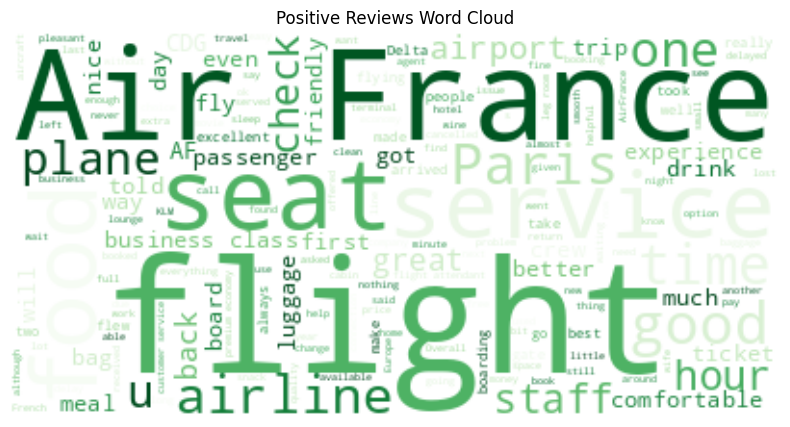

In [22]:
plt.figure(figsize=(10, 5))
wordcloud_pos = WordCloud(background_color='white', colormap='Greens').generate(positive_reviews)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Reviews Word Cloud')
plt.show()

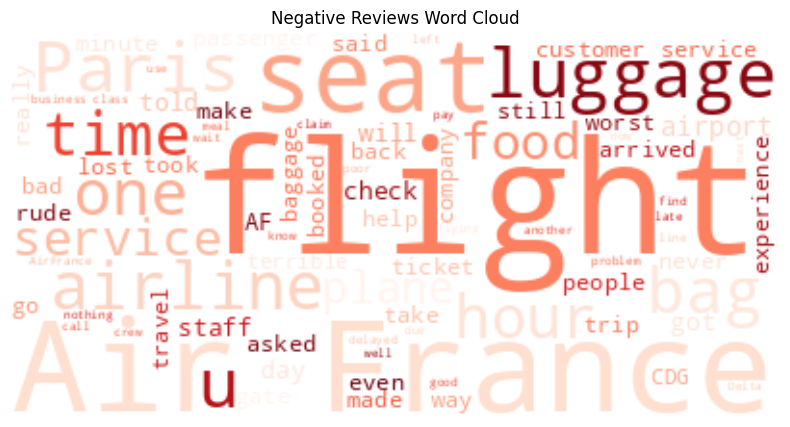

In [23]:
plt.figure(figsize=(10, 5))
wordcloud_neg = WordCloud(background_color='white', colormap='Reds').generate(negative_reviews)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Reviews Word Cloud')
plt.show()

In [24]:
print("Analysis completed. Review visualizations and summaries for insights.")

Analysis completed. Review visualizations and summaries for insights.


<ipython-input-25-78445c36ca52>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette='viridis')


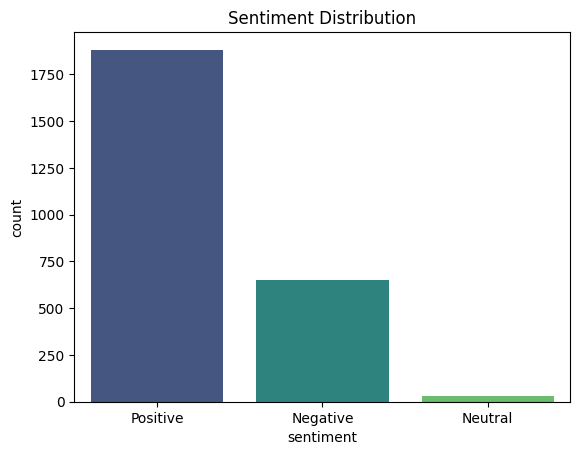

In [25]:
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

sns.countplot(x='sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.show()

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
dtm = vectorizer.fit_transform(df['text'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for index, topic in enumerate(lda.components_):
    print(f"Topic {index + 1}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Topic 1:
['cdg', 'plane', 'minutes', 'gate', 'hour', 'hours', 'paris', 'time', 'airport', 'flight']
Topic 2:
['days', 'told', 'customer', 'airline', 'service', 'paris', 'luggage', 'flight', 'france', 'air']
Topic 3:
['premium', 'paris', 'service', 'food', 'seat', 'seats', 'economy', 'france', 'air', 'flight']
Topic 4:
['great', 'time', 'class', 'seats', 'france', 'air', 'service', 'food', 'good', 'flight']
Topic 5:
['plane', 'security', 'don', 'france', 'asked', 'air', 'just', 'people', 'flight', 'check']


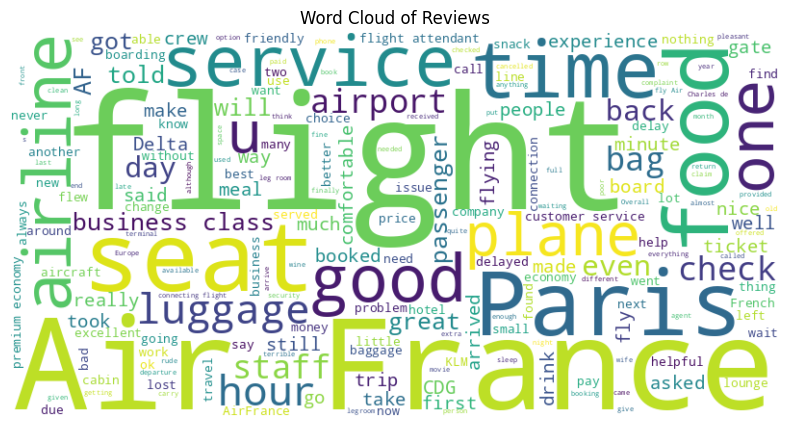

In [27]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reviews')
plt.show()